# DSV Alvin Project

The deep sea is one of the most mysterious, hostile, and alien environments on the planet. Atmospheric pressure ranges from 0 to 10,000PSI in the deepest areas of our ocean. Only around ~5-7% of the deep ocean has been explored worldwide. The deep ocean has layers to it that hide an inconcievable amount of life. Everyday the largest migration on earth, the 'Diel vertical migration (DVM)' takes place daily between the Midnight zone, also called the 'Mesopelagic Zone', and the ocean's surface, the 'Epipelagic Zone'. The 'bristlemouth fish', which resides primarily in the midnight zone, may number in the quadrillions, making it the most numerous vertebrate on earth. 

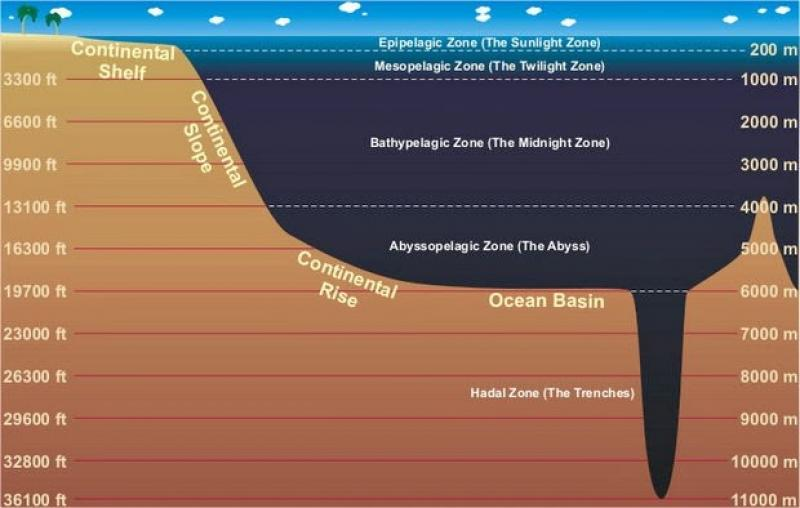

In [5]:
from IPython.display import Image
Image("images/ocean_layers.jpg", width = 600)

In order for us to explore this vast and alien world, we need a machine that can handle this hostile environment. Since 1964, the Woods Hole Oceanographic Institution's, or WHOI, submersible, 'DSV Alvin' has been that vehicle. 'DSV Alvin' has gone on over 5000 dives and conducted various missions for biological, geographical, geochemical, and engineering related purposes.

If you would like to know more about the deep sea, its vastness, the creatures that live in it, and the 'DSV Alvin' submersible please visit the following websites which have provided some of the information for this project.

https://ocean.si.edu/ecosystems/deep-sea/deep-sea

https://www.nature.com/articles/s41586-019-1796-9

https://en.wikipedia.org/wiki/DSV_Alvin

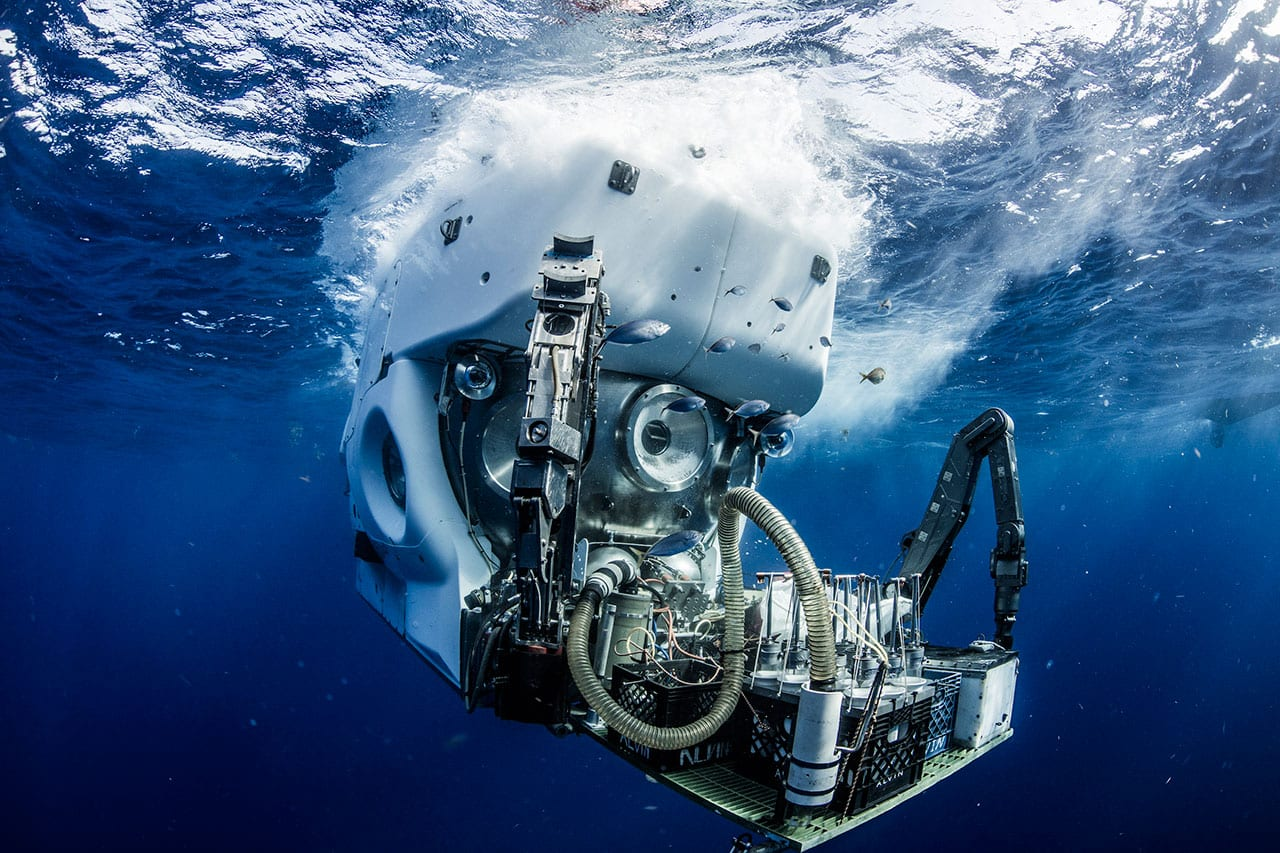

In [6]:
from IPython.display import Image
Image("images/Alvin_underwater1.jpg", width = 600)

### Research Question: 
Can we accurately predict and/or classify what the mission purpose is of the DSV Alvin based off of five criteria listed below?

In [7]:
# imports the primary modules used for data importation, computation, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#imports the DSV Alvin dataset
alvin = pd.read_csv('data/alvin_data_cleaned (2).csv')
alvin.head()

,Unnamed: 0,dive_nu,date,op_area,cruise,leg,purpose,depth,dive_time,bottom_time,chief_sci,pilot,obs1,obs2,lat(DD),long(DD)
0,0,5065,3/11/2020,Cinqueteague,AT-42,24,Seep Biology,1034,179,124.0,Young,"Forte, P.",Tianing Wu,Sarah Gahan,37.540833,-74.103767
1,1,5064,3/11/2020,Baltimore Canyon,AT-42,24,Seep Biology,383,119,98.0,Young,"Bewley, D.",Dan Bowling,Aurora Meyer,38.046833,-73.822833
2,2,5063,3/8/2020,Blake Ridge,AT-42,24,Seep Biology,2167,286,184.0,Young,"Forsman, D.",Ian Grace,Pat Lyon,32.496000,-76.189183
3,3,5062,3/3/2020,Florida Escarpment,AT-42,24,Seep Biology,3298,540,357.0,Young,"Strickrott, B.",Manuel Maldonado,Traylee Chapman,26.027900,-84.909900
4,4,5061,3/1/2020,Mississippi Canyon 853,AT-42,24,Seep Biology,1098,394,330.0,Young,"Forte, P.",Caitlin Plowman,Laura Anthony,28.122517,-89.140517


In [10]:
#replace any missing values in the dataset with NaN
alvin = alvin[['date', 'op_area', 'purpose', 'depth', 'dive_time', 'bottom_time', 'lat(DD)', 'long(DD)']]
alvin = alvin.replace('...', np.NaN)
alvin.head()

,date,op_area,purpose,depth,dive_time,bottom_time,lat(DD),long(DD)
0,3/11/2020,Cinqueteague,Seep Biology,1034,179,124.0,37.540833,-74.103767
1,3/11/2020,Baltimore Canyon,Seep Biology,383,119,98.0,38.046833,-73.822833
2,3/8/2020,Blake Ridge,Seep Biology,2167,286,184.0,32.496000,-76.189183
3,3/3/2020,Florida Escarpment,Seep Biology,3298,540,357.0,26.027900,-84.909900
4,3/1/2020,Mississippi Canyon 853,Seep Biology,1098,394,330.0,28.122517,-89.140517


In [11]:
#rename the columns
alvin = alvin.rename(columns = {'depth': 'depth_meters','dive_time': 'dive_time_min','bottom_time': 'bottom_time_min'})
alvin.head()

,date,op_area,purpose,depth_meters,dive_time_min,bottom_time_min,lat(DD),long(DD)
0,3/11/2020,Cinqueteague,Seep Biology,1034,179,124.0,37.540833,-74.103767
1,3/11/2020,Baltimore Canyon,Seep Biology,383,119,98.0,38.046833,-73.822833
2,3/8/2020,Blake Ridge,Seep Biology,2167,286,184.0,32.496000,-76.189183
3,3/3/2020,Florida Escarpment,Seep Biology,3298,540,357.0,26.027900,-84.909900
4,3/1/2020,Mississippi Canyon 853,Seep Biology,1098,394,330.0,28.122517,-89.140517


In [12]:
# create a new column called 'year' from the 'date' column.
alvin['year'] = pd.DatetimeIndex(alvin['date']).year
alvin.head()

,date,op_area,purpose,depth_meters,dive_time_min,bottom_time_min,lat(DD),long(DD),year
0,3/11/2020,Cinqueteague,Seep Biology,1034,179,124.0,37.540833,-74.103767,2020
1,3/11/2020,Baltimore Canyon,Seep Biology,383,119,98.0,38.046833,-73.822833,2020
2,3/8/2020,Blake Ridge,Seep Biology,2167,286,184.0,32.496000,-76.189183,2020
3,3/3/2020,Florida Escarpment,Seep Biology,3298,540,357.0,26.027900,-84.909900,2020
4,3/1/2020,Mississippi Canyon 853,Seep Biology,1098,394,330.0,28.122517,-89.140517,2020


In [13]:
zero_not_accepted = ['depth_meters', 'dive_time_min', 'bottom_time_min', 'lat(DD)', 'long(DD)', 'year']

In [14]:
# removes any possible zeroes from the dataset so the dataset does not get skewed
for column in zero_not_accepted:
    alvin[column] = alvin[column].replace(0, np.NaN)
    mean = int(alvin[column].mean(skipna=True))
    alvin[column] = alvin[column].replace(np.NaN, mean)

# Data Breakdown

In [15]:
# data breakdown of its count and data type
alvin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             5065 non-null   object 
 1   op_area          5065 non-null   object 
 2   purpose          5065 non-null   object 
 3   depth_meters     5065 non-null   float64
 4   dive_time_min    5065 non-null   float64
 5   bottom_time_min  5065 non-null   float64
 6   lat(DD)          5065 non-null   float64
 7   long(DD)         5065 non-null   float64
 8   year             5065 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 356.3+ KB


In [16]:
# basic statistical values of all columns, i.e. mean, standard deviation, max/min, etc...
print(alvin.describe())

       depth_meters  dive_time_min  bottom_time_min      lat(DD)     long(DD)  \
count   5065.000000    5065.000000      5065.000000  5065.000000  5065.000000   
mean    2078.791115     422.816387       303.283317    26.391790   -92.199592   
std     1042.246928     131.289655        50.259729    16.139811    39.872309   
min        1.000000       1.000000         3.000000   -37.792717  -176.883333   
25%     1326.000000     382.000000       303.000000     9.848000  -118.055000   
50%     2272.000000     465.000000       303.000000    27.016667  -104.242900   
75%     2614.000000     513.000000       303.000000    39.869333   -72.518333   
max     4500.000000    1350.000000       500.000000    58.922000   146.983333   

              year  
count  5065.000000  
mean   1991.975123  
std      13.518410  
min    1964.000000  
25%    1982.000000  
50%    1992.000000  
75%    2002.000000  
max    2020.000000  


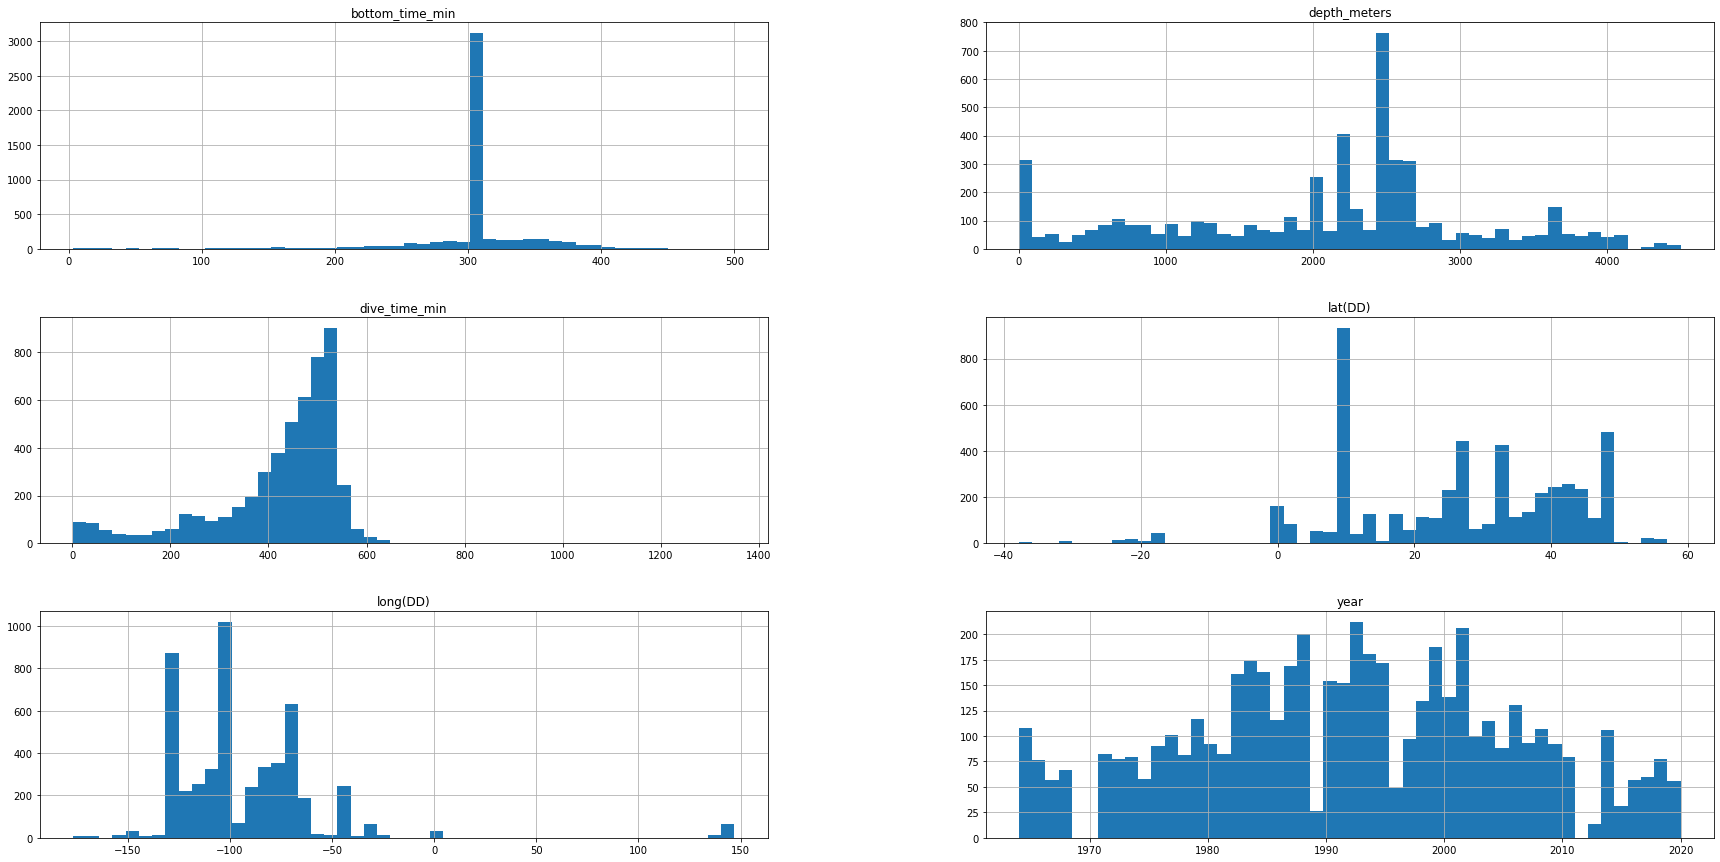

In [17]:
#visualization of numerical and/or float values listed above.
alvin.hist(bins=50, figsize=(30,15))
("histograms")
plt.show()

# Let's visualize these dives

#### Y-Axis inverted bar chart of all dives from 1964 to 2020.

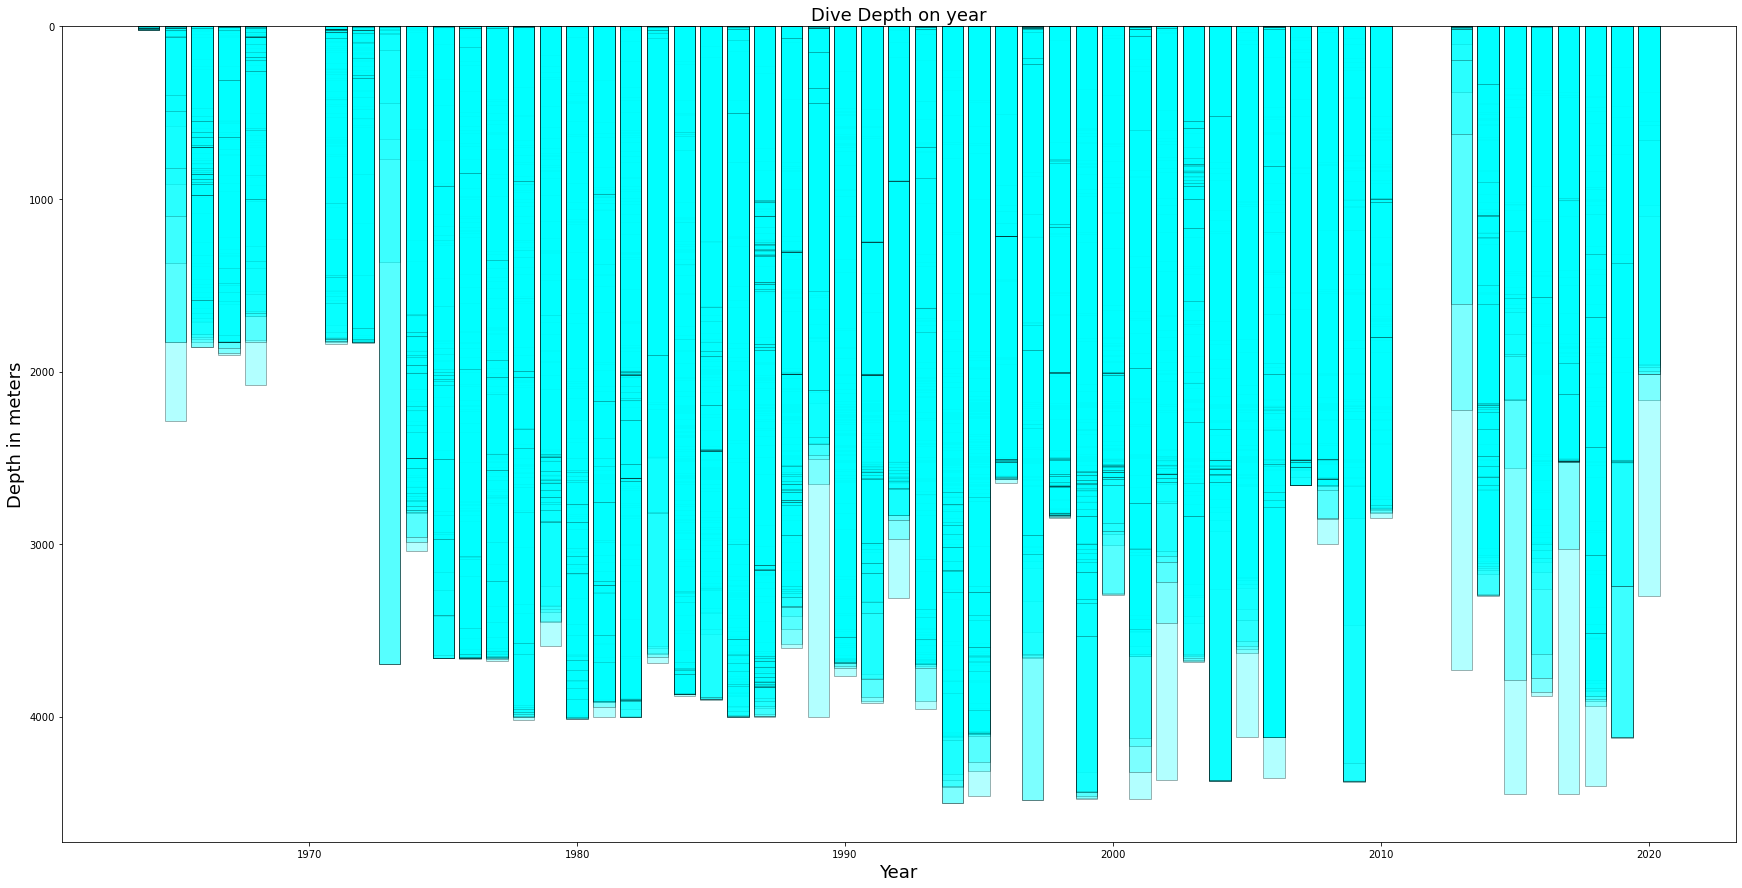

In [18]:
#bar plot features
plt.figure(figsize=(30,15))
plt.bar("year", "depth_meters", data = alvin, alpha=0.3, edgecolor='black', color = "aqua")

# inverts y-axis for user friendly visualization
plt.gca().invert_yaxis()

# labels the axises
plt.xlabel("Year", fontsize=18)
plt.ylabel("Depth in meters", fontsize=18)
plt.title("Dive Depth on year", fontsize=18)
plt.show()

Looking at the figure above, we can see that the 'Alvin' Submersible has gone on thousands of dives since June of 1964. 5065 to be exact. We can also see that there is an upward or in this case a 'downward' trend of diving depth over the last 56 years. This is because Alvin is stripped down, re-engineered with new parts, and reassembled every 3-5 years to dive deeper and do more. You can see from the graph above that in 1973, the DSV Alvin's hull was replaced by one made of titanium which doubled its maximum depth. 

The DSV Alvin is as WHOI personnel call it, the 'swiss army knife' of ocean exploration. It is a truly an amazing piece of engineering. The DSV Alvin can be reconfigured for nearly any possible deep sea mission.

Let's examine that as well...

In [19]:
depth = alvin[['purpose', 'depth_meters']].groupby('purpose').median().round()
depth.head(15)

,depth_meters
purpose,
Aborted - Battery Disconnect,175.0
Acoustics,1829.0
Alvin Tests,3550.0
Amuvs Tests,2008.0
Array Inspection,2745.0
Bbc Film,725.0
Biochemistry,2507.0
Biodiversity,2506.0
Biogeochemistry,1909.0


# Data Model

Now that we've seen a breakdown of the data, a simple time-series dive visualization, and the median depth for each of the dive purposes that 'Alvin' is capable of, lets build a data model that might help us predict the purpose of the dive based off of the numerical values presented in the meter depth, dive & bottom time, and latitute & longitude columns of the dataset.

One of the most common and best machine learning algorithms and data models we can use to predict and classify the purpose of DSV Alvin's dive is the 'k-NN' or 'k-nearest neighbors algorithm'. It is primarily used for classification and regression. We are trying to classify our data so this is the one we will use. the 'k' in 'k-nearest neighbors' refers to the number of neighbors OR nearby values it will use to accurately classify the data.

You can read more about k-NN here: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm.

First we need to import our modules so that we can train and test our datasets...

In [20]:
#imports the modules from sklearn for k-NN data modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# creates a dictionary of unique values
alvin_dive_purpose = dict(zip(alvin.depth_meters.unique(), alvin.purpose.unique()))
n = len(pd.unique(alvin['purpose']))
# prints the number of unique values
print("No.of.unique values :", 
      n)
#lists the unique values in the dictionary
alvin_dive_purpose

No.of.unique values : 198


{1034.0: 'Seep Biology',
 383.0: 'Microbiology',
 2167.0: 'Biogeochemistry',
 3298.0: 'Engineering',
 1098.0: 'Biology',
 549.0: 'Biology/Geology',
 572.0: 'Geology',
 658.0: 'Geochemistry',
 660.0: 'Chemistry',
 1956.0: 'Training',
 1961.0: 'Certification',
 1971.0: 'Geochemistry/Biology',
 1997.0: 'Cork Servicing',
 2017.0: 'Optimodem Tests',
 2516.0: 'Biology/Chemistry',
 2532.0: 'Brine Sampling',
 2517.0: 'Science Verification',
 2526.0: 'Oil Spill Repsonse',
 2523.0: 'Microbiology/Abc News',
 2518.0: 'Geophysics',
 2515.0: 'Chemistry/Microbiology',
 2511.0: 'Cork',
 2000.0: 'Wellhead Data',
 526.0: 'Biochemistry',
 523.0: 'Biology/Today Show',
 234.0: 'Instrument Recovery',
 738.0: 'Geochemistry/Auv Recovery',
 459.0: 'Microbio',
 1320.0: 'Optical Data Tests/Biology',
 685.0: 'Odp Work',
 1807.0: 'Optical Data Tests',
 4120.0: 'Manipulator Recovery',
 4119.0: 'Odp Download',
 4125.0: 'Biology, Chemistry',
 1913.0: 'Physics',
 2521.0: 'Moorings, Biology',
 2509.0: 'Uplift, Chem, Bi

In [22]:
# creates a train-test split for the X, y variables that lists the specific features used to predict
X = alvin[['depth_meters','dive_time_min','bottom_time_min', 'lat(DD)', 'long(DD)']]
y = alvin['purpose']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
# creates the classifier object
alvin_knn =  KNeighborsClassifier(n_neighbors = 15)

In [24]:
# trains the classifier
alvin_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [25]:
# accuracy estimation of the classifier for future data
alvin_knn.score(X_test, y_test)

0.4151539068666141

The accuracy score above of .415 is defined as the fraction of the test set items that were accurately predicted by the classifier. So, essentially, the classifier for the 'DSV Alvin' is accurate ~41% of the time in determining the purpose of the dive mission.

In [26]:
# classifies the new and unseen objects using the k-NN machine learning model
alvin_predict = alvin_knn.predict([[1500, 200, 100, 50, 65]])
[alvin_predict[0]]

['Engineering']

Based off of the features entered, 1500m diving depth, 100min total dive time, 50min total bottom time, 50 degrees latitude, 65 degrees longitude, we can be 41% sure that the purpose of the mission is engineering based.

# Conclusion

Our initial research question of whether we can accurately predict the true mission purpose of the DSV Alvin has been answered. Such a low k-NN score tells us that these features are not really enough to predict the purpose of the Alvin with any true accuracy. Perhaps additional features from the original data set could assist us in making a better prediction model.